## Importing necessary libraries so as to continue with preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

Analysing Basic features of the dataset.

In [2]:
df = pd.read_csv('train (1).csv', low_memory = False)

In [3]:
df.shape

(550068, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Finding out the percentage of missing values(if any) per column of dataset. The null/NAN values will further be imputed with mean/median of the column, so as to homogenise the data.

In [8]:
missing_values = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': missing_values})
missing_value_df

,percent_missing
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


Finding out the number of null/NAN values per column of dataset.

In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

##### Since 2 columns ie Product_Category_2 and Product_Category_3 have a significant amount of null values, we impute it with corresponding mean values.

In [10]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(5.000000).astype("float32")

In [11]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(9.000000).astype("float32")

In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [13]:
df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3', 'Purchase']].corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.003064,0.003384,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.004160,0.011993,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.006307,0.003140,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.123899,-0.199458,-0.343703
Product_Category_2,0.003064,0.004160,0.006307,0.123899,1.000000,0.109967,-0.046816
Product_Category_3,0.003384,0.011993,0.003140,-0.199458,0.109967,1.000000,0.177571
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.046816,0.177571,1.000000


In [14]:
df.nunique().Marital_Status

2

Finding number of duplicate row(if present), so as to remove them since they can affect our model and make it more biased towards certain values.

In [15]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(0, 12)

Find the number of unique values in each column of the dataset.

In [16]:
print(df.apply(lambda col: len(col.unique())))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64


# Feature Engineering

Label Encoding helps to convert categorical data to numerical data so that it'll be easiler to handle , operate andinfer details from the particular columns.

The columns encoded are - Age
                        - City_Category
                        - Stay_In_Current_City_Years
                        - Gender

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age']=le.fit_transform(df['Age'])
df['Age'].head()

0    0
1    0
2    0
3    0
4    6
Name: Age, dtype: int32

In [18]:
df['City_Category']=le.fit_transform(df['City_Category'])
df['City_Category'].head()

0    0
1    0
2    0
3    0
4    2
Name: City_Category, dtype: int32

In [19]:
df['Stay_In_Current_City_Years']=le.fit_transform(df['Stay_In_Current_City_Years'])
df['Stay_In_Current_City_Years'].head()

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: int32

In [20]:
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int32

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,5.0,9.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,5.0,9.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,9.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,5.0,9.0,7969


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float32
 10  Product_Category_3          550068 non-null  float32
 11  Purchase                    550068 non-null  int64  
dtypes: float32(2), int32(4), int64(5), object(1)
memory usage: 37.8+ MB


# EDA ( Exploratory Data Analysis)
 
To find the relations between various attributes/columns/features of the dataset,observing relationships between them so that we can find patterns between them.

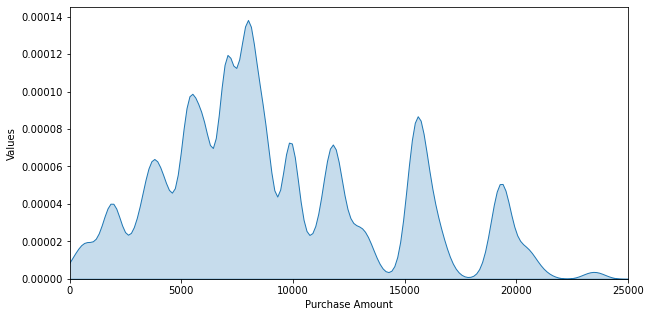

In [23]:
plt.figure(figsize=(10,5))
plt.xlim(0,25000)
plt.xlabel('Purchase Amount')
plt.ylabel('Values')
sns.kdeplot(df['Purchase'],shade=True)
plt.show()

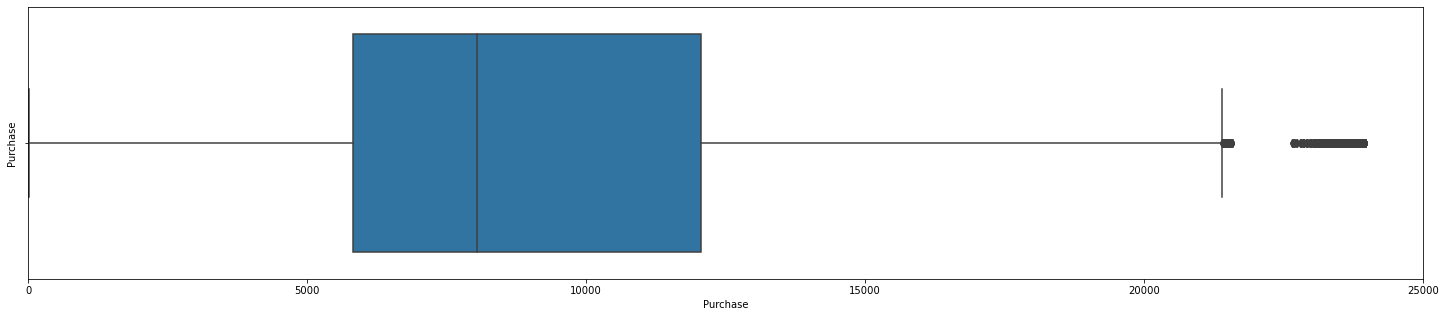

In [24]:
plt.figure(figsize=(25,5))
plt.xlim(0,25000)
plt.ylabel('Purchase')
sns.boxplot(x=df['Purchase'])
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

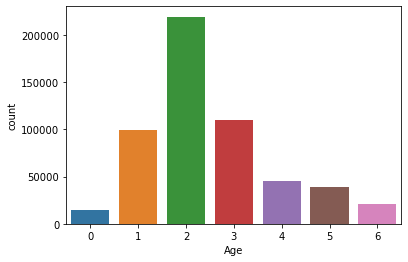

In [25]:
sns.countplot(df['Age'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

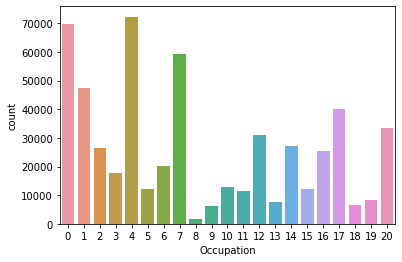

In [26]:
sns.countplot(df['Occupation'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

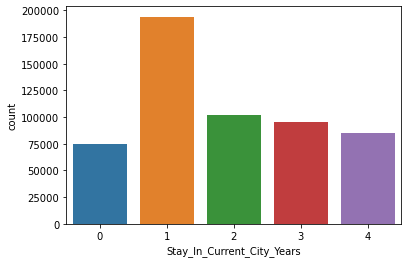

In [27]:
#sns.swarmplot(x='Stay_In_Current_City_Years', y='Age', data=df)
sns.countplot(df['Stay_In_Current_City_Years'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(


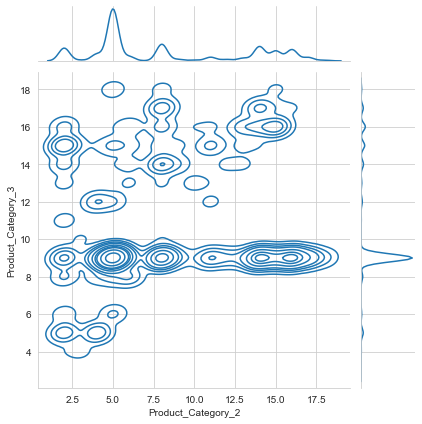

In [28]:
sns.set_style('whitegrid')
sns.jointplot(x ='Product_Category_2', y ='Product_Category_3', data = df, kind='kde', bins = 15)

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

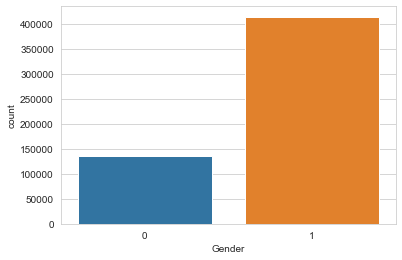

In [29]:
sns.countplot(df['Gender'])

Correlation heatmap is used to find the raltive correlation between various columns of the dataset , columns having a greater correlation are found to be better at acheiving accuracy.

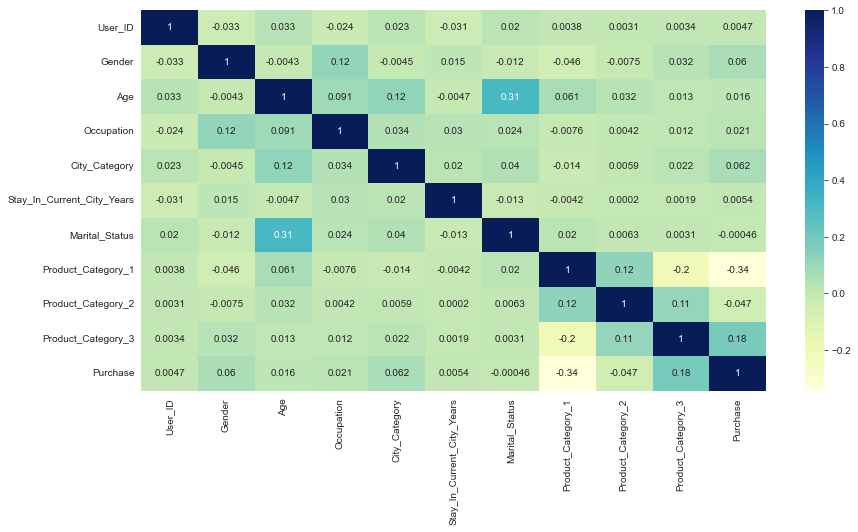

In [30]:
plt.figure(figsize=(14,7))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
#plt.show()

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,5.0,9.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,5.0,9.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,9.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,5.0,9.0,7969


### Train Test Split

In [32]:
X = df.drop(columns=['User_ID','Product_ID','Purchase'])
y = df['Purchase'] 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, random_state = 42,test_size=0.4,shuffle = True)

In [34]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(330040, 9)
(220028, 9)
(330040,)
(220028,)


In [35]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5)

In [36]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(110014, 9)
(110014, 9)
(110014,)
(110014,)


In [37]:
X_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
118460,1,1,0,0,1,0,1,16.0,9.0
445597,1,3,7,2,3,0,1,2.0,5.0
59548,1,2,14,1,4,0,5,5.0,9.0
412577,1,2,0,1,3,0,4,5.0,9.0
354323,1,2,0,2,1,0,5,14.0,9.0


In [38]:
X_train.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,330040.000000,330040.000000,330040.000000,330040.000000,330040.000000,330040.000000,330040.000000,330040.000000,330040.000000
mean,0.754178,2.496567,8.081296,1.043361,1.860381,0.410408,5.406293,8.308072,10.109329
std,0.430574,1.354873,6.521637,0.760223,1.289752,0.491909,3.938122,4.772517,2.825483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5.000000,9.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,5.000000,9.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,9.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000


## Feature Selection

finding closely connected features which are above a give threshold of correlation such that it is easier to predict values for the same.

In [39]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

9

In [40]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [41]:
def handling_correlation(X_train,threshold=0.55):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [42]:
train=X_train.copy()
handling_correlation(train.copy(),0.05)

['City_Category',
 'Occupation',
 'Product_Category_1',
 'Product_Category_3',
 'Marital_Status',
 'Product_Category_2']

In [43]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.1)
sel.fit(X_train)

VarianceThreshold(threshold=0.1)

In [44]:
sel.variances_

array([ 0.1853934 ,  1.8356748 , 42.53161963,  0.57793739,  1.66345393,
        0.24197324, 15.5087563 , 22.75602502,  7.97007658])

# Data Modelling 

We here find out the mean_squared error, r2_score and cross_val_score across a set of models. Ideally the model with lesser mean_squared_error, greater r2_score and lesser cross_val_score is said to be better.

The models used here are - Linear Regressor
                         - Decision Tree Regressor
                         - Random Forest Regressor
                         - XGBoost Regressor

In [45]:
MSE_Score = []
R2_Score = []
CV_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [47]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))
cv_score = cross_val_score(LinearRegression(normalize=True),X, y ,scoring= 'neg_mean_squared_error',cv=5)
cv_score = np.abs(np.mean(cv_score))
CV_Score.append(np.sqrt(cv_score))

In [48]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

4679.287457220263

In [49]:
for i in Algorithm, MSE_Score, R2_Score,CV_Score:
    print(i,end=',')

['LinearRegression'],[21611003.46002542],[0.1364956237353826],[4670.100726029803],

In [50]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regression')
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [51]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))
cv_score = cross_val_score(DecisionTreeRegressor(),X, y ,scoring= 'neg_mean_squared_error',cv=5)
cv_score = np.abs(np.mean(cv_score))
CV_Score.append(np.sqrt(cv_score))

In [52]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3376.688660790635

In [53]:
for i in Algorithm, MSE_Score, R2_Score,CV_Score:
    print(i,end=',')

['LinearRegression', 'Decision Tree Regression'],[21611003.46002542, 11422207.051201997],[0.1364956237353826, 0.5436063025228031],[4670.100726029803, 3320.8221455327393],

In [54]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regression')
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [55]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))
cv_score = cross_val_score(RandomForestRegressor(),X, y ,scoring= 'neg_mean_squared_error',cv=5)
cv_score = np.abs(np.mean(cv_score))
CV_Score.append(np.sqrt(cv_score))

In [56]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3058.9454287536323

In [57]:
for i in Algorithm, MSE_Score, R2_Score,CV_Score:
    print(i,end=',')

['LinearRegression', 'Decision Tree Regression', 'Random Forest Regression'],[21611003.46002542, 11422207.051201997, 9389893.065722631],[0.1364956237353826, 0.5436063025228031, 0.6248108622116365],[4670.100726029803, 3320.8221455327393, 3047.71897381446],

In [58]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [59]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))
cv_score = cross_val_score(xgb.XGBRegressor(),X, y ,scoring= 'neg_mean_squared_error',cv=5)
cv_score = np.abs(np.mean(cv_score))
CV_Score.append(np.sqrt(cv_score))

In [60]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2887.545028481222

In [61]:
for i in Algorithm, MSE_Score, R2_Score,CV_Score:
    print(i,end=',')

['LinearRegression', 'Decision Tree Regression', 'Random Forest Regression', 'XGB Regressor'],[21611003.46002542, 11422207.051201997, 9389893.065722631, 8309825.839680518],[0.1364956237353826, 0.5436063025228031, 0.6248108622116365, 0.6679667840582315],[4670.100726029803, 3320.8221455327393, 3047.71897381446, 2884.6100109228883],

In [62]:
comparison_dataframe = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score,CV_Score)), columns=['Algorithms','MSE_Score', 'R2_Score','CV_Score'])
comparison_dataframe.head()

,Algorithms,MSE_Score,R2_Score,CV_Score
0,LinearRegression,2.161100e+07,0.136496,4670.100726
1,Decision Tree Regression,1.142221e+07,0.543606,3320.822146
2,Random Forest Regression,9.389893e+06,0.624811,3047.718974
3,XGB Regressor,8.309826e+06,0.667967,2884.610011


As observed from the table above , XGB Regressor fits all the parameters(mentioned above) of a better model. Hence we select it to be operating on our test dataset.

In [63]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [64]:
mean_squared_error(y_test,predictedfinal,squared=False)

2882.676853148913

In [65]:
mean_squared_error(y_val,predictedfinal,squared=False)

6467.970278274579

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, predictedfinal)

0.6679667840582315

In [67]:
r2_score(y_val, predictedfinal)

-0.654533767785419

Finding accuracy across train test and validation datasets.

In [68]:
accuracy_train = regressorfinal.score(X_train, y_train)*100
print(accuracy_train,2)

68.24487560355931 2


In [69]:
accuracy_val = regressorfinal.score(X_val, y_val)*100
print(accuracy_val, 2)

67.02406375353482 2


In [70]:
accuracy_test = regressorfinal.score(X_test, y_test)*100
print(accuracy_test, 2)

66.79667840582314 2


### Implementing the model on test dataset.

In [71]:
test_df = pd.read_csv('test.csv')

In [72]:
test_df.shape

(233599, 11)

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [74]:
test_df1 = test_df.copy()

In [75]:
Label Encoding the categorical features of test dataset.

SyntaxError: invalid syntax (Temp/ipykernel_12360/969814932.py, line 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df['Age']=le.fit_transform(test_df['Age'])
test_df['Gender']=le.fit_transform(test_df['Gender'])
test_df['City_Category']=le.fit_transform(test_df['City_Category'])
test_df['Stay_In_Current_City_Years']=le.fit_transform(test_df['Stay_In_Current_City_Years'])

In [ ]:
test_df.info()

In [ ]:
test_df.drop(columns = ['User_ID','Product_ID'],axis=1,inplace=True)
test_df.shape

In [ ]:
test_df.columns

In [ ]:
#test_df2 = test_df1[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status','Product_Category_1','Product_Category_2', 'Product_Category_3']]

### Predicting the value of the test dataset using the selected regressor model.

In [ ]:
finalresult = regressorfinal.predict(test_df)

In [ ]:
finalresult

In [ ]:
finalresult = pd.Series(finalresult,name='Purchase')
finalresult.head()

In [ ]:
test_df1.columns

Adding the prdicted column to original dataset to get the desired, processed dataset.

In [ ]:
test_df1['Purchase'] = finalresult

In [ ]:
test_df1.head()

Storing the desired Dataset in a csv.

In [ ]:
test_df1.to_csv(r'C:\Users\KIIT\Downloads\BlackFridayPurchase.csv', index=False)

## End of project